# HW 13 - Classification

## Task 1. Books classification
Build classificator for books classification on the basis of reader's reviews. For this task we will be using UCI Amazon book review dataset (https://archive.ics.uci.edu/dataset/215/amazon+commerce+reviews+set). You will need to do the following:
1. Acquire the data from the repository.
2. Preprocess data, so that it can be used for classification
3. Select and train your classificator
4. Validate your classification results

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [109]:
data, meta = arff.loadarff('Amazon_initial_50_30_10000.arff')
df = pd.DataFrame(data)

for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

df

,the,and,a,of,to,is,I,in,that,it,...,ra_,le_to,bra,uch_a,ave_a,n_in_,ied_,nd_b,rso,class_1
0,5.0,3.0,4.0,4.0,1.0,5.0,1.0,3.0,2.0,4.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Agresti
1,12.0,3.0,6.0,2.0,3.0,4.0,2.0,0.0,1.0,3.0,...,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,Agresti
2,3.0,2.0,2.0,4.0,4.0,2.0,2.0,2.0,3.0,1.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,Agresti
3,18.0,4.0,6.0,5.0,4.0,2.0,1.0,0.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Agresti
4,13.0,4.0,7.0,5.0,4.0,5.0,0.0,1.0,0.0,4.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,Agresti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,15.0,11.0,5.0,9.0,10.0,0.0,5.0,6.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,Wilson
1496,12.0,7.0,7.0,5.0,5.0,3.0,3.0,2.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wilson
1497,8.0,10.0,2.0,4.0,2.0,0.0,2.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wilson
1498,11.0,12.0,10.0,7.0,8.0,4.0,4.0,7.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,Wilson


In [110]:
X = df.drop('class_1', axis=1)
y = df['class_1']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Unique classes: {y.nunique()}")

Features shape: (1500, 10000)
Target shape: (1500,)
Unique classes: 50


In [111]:
print("Class distribution in y:")
print(y.value_counts())

Class distribution in y:
class_1
Agresti        30
Neal           30
Lawyeraau      30
Lee            30
Lovitt         30
Mahlers2nd     30
Mark           30
McKee          30
Merritt        30
Messick        30
Mitchell       30
Morrison       30
Nigam          30
Ashbacher      30
Peterson       30
Power          30
Riley          30
Robert         30
Shea           30
Sherwin        30
Taylor         30
Vernon         30
Vision         30
Walters        30
Kolln          30
Koenig         30
Johnson        30
Janson         30
Auken          30
Blankenship    30
Brody          30
Brown          30
Bukowsky       30
Calvinnme      30
CFH            30
Chachra        30
Chandler       30
Chell          30
Cholette       30
Comdet         30
Corn           30
Cutey          30
Davisson       30
Dent           30
Engineer       30
Goonan         30
Grove          30
Harp           30
Hayes          30
Wilson         30
Name: count, dtype: int64


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 1200
Testing set size: 300


In [113]:
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_lr.fit(X_train, y_train)

y_pred_lr = clf_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr, zero_division=0))

Logistic Regression Accuracy: 0.7333
Classification Report:
              precision    recall  f1-score   support

     Agresti       0.50      0.67      0.57         3
   Ashbacher       0.64      0.78      0.70         9
       Auken       0.70      1.00      0.82         7
 Blankenship       0.67      0.40      0.50         5
       Brody       0.60      0.75      0.67         4
       Brown       0.00      0.00      0.00         3
    Bukowsky       0.71      0.83      0.77         6
         CFH       0.50      0.40      0.44         5
   Calvinnme       0.75      0.86      0.80         7
     Chachra       0.62      0.71      0.67         7
    Chandler       1.00      0.67      0.80         6
       Chell       0.62      0.62      0.62         8
    Cholette       0.75      0.60      0.67         5
      Comdet       0.80      0.80      0.80         5
        Corn       0.83      0.50      0.62        10
       Cutey       1.00      1.00      1.00         7
    Davisson       1.

In [114]:
clf_nb = MultinomialNB(alpha=1.0)
clf_nb.fit(X_train, y_train)

y_pred_nb = clf_nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Multinomial Naive Bayes Accuracy: {accuracy_nb:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb, zero_division=0))

Multinomial Naive Bayes Accuracy: 0.7033
Classification Report:
              precision    recall  f1-score   support

     Agresti       0.50      0.67      0.57         3
   Ashbacher       1.00      0.44      0.62         9
       Auken       1.00      1.00      1.00         7
 Blankenship       0.57      0.80      0.67         5
       Brody       1.00      0.50      0.67         4
       Brown       1.00      0.33      0.50         3
    Bukowsky       0.45      0.83      0.59         6
         CFH       1.00      0.40      0.57         5
   Calvinnme       0.75      0.43      0.55         7
     Chachra       1.00      0.29      0.44         7
    Chandler       0.38      0.83      0.53         6
       Chell       1.00      0.62      0.77         8
    Cholette       1.00      0.40      0.57         5
      Comdet       0.71      1.00      0.83         5
        Corn       0.71      0.50      0.59        10
       Cutey       1.00      1.00      1.00         7
    Davisson     

In [115]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

Random Forest Accuracy: 0.6600
Classification Report:
              precision    recall  f1-score   support

     Agresti       0.38      1.00      0.55         3
   Ashbacher       0.57      0.44      0.50         9
       Auken       1.00      1.00      1.00         7
 Blankenship       1.00      1.00      1.00         5
       Brody       0.25      0.50      0.33         4
       Brown       0.67      0.67      0.67         3
    Bukowsky       0.43      0.50      0.46         6
         CFH       1.00      0.60      0.75         5
   Calvinnme       0.75      0.43      0.55         7
     Chachra       0.38      0.71      0.50         7
    Chandler       0.40      0.67      0.50         6
       Chell       0.83      0.62      0.71         8
    Cholette       0.50      0.40      0.44         5
      Comdet       0.67      0.80      0.73         5
        Corn       1.00      0.30      0.46        10
       Cutey       0.54      1.00      0.70         7
    Davisson       0.50    

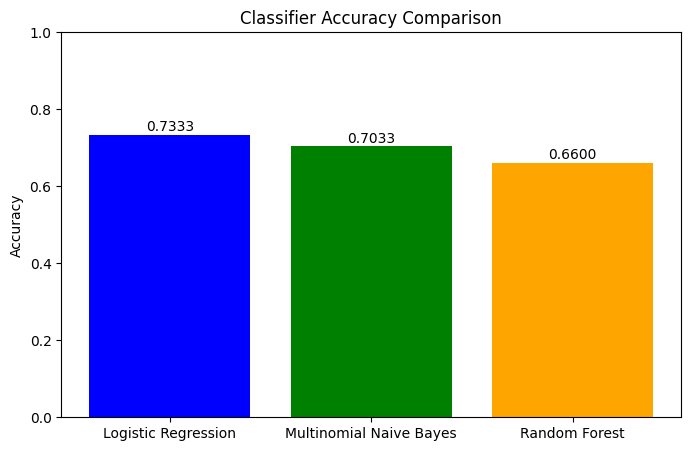

In [81]:
accuracies = {
    'Logistic Regression': accuracy_lr,
    'Multinomial Naive Bayes': accuracy_nb,
    'Random Forest': accuracy_rf
}

plt.figure(figsize=(8, 5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])
plt.title('Classifier Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.4f}', ha='center')

plt.show()

## Task 2. Ensemble classifier
Create your own ensemble classifier. The classifier is configured with a set of base classifiers, which are all fitted to the provided data. Classification is performed as a majority vote. The class, which was predicted by most of the provided classifiers is return as the result. If there is a draw, then the class is picked randomly from the set of classes, which had maximal number of predictions by the base classifiers.

To implement your classifier follow the example of Session 13.

Test your classifier on the classification problem from Task 1. Try to make an ensemble of classifiers, which will give you better classification results, then those acquired in Task 1.

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [117]:
class CustomEnsembleClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, classifiers):
        self.classifiers = classifiers

    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
        return self

    def predict(self, X):
        predictions = np.array([clf.predict(X) for clf in self.classifiers]).T
        majority_votes = []
        for preds in predictions:
            vote_count = Counter(preds)
            max_votes = max(vote_count.values())
            candidates = [cls for cls, count in vote_count.items() if count == max_votes]
            majority_votes.append(np.random.choice(candidates))
        return np.array(majority_votes)

In [118]:
data, meta = arff.loadarff('Amazon_initial_50_30_10000.arff')
df = pd.DataFrame(data)

for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

X = df.drop('class_1', axis=1)
y = df['class_1']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Unique classes: {y.nunique()}")

Features shape: (1500, 10000)
Target shape: (1500,)
Unique classes: 50


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 1200
Testing set size: 300


In [120]:
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_nb = MultinomialNB(alpha=1.0)
clf_rf = RandomForestClassifier(random_state=42, n_estimators=100)

clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, zero_division=0))

clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Multinomial Naive Bayes Accuracy: {accuracy_nb:.4f}")
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, zero_division=0))

clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

Logistic Regression Accuracy: 0.7333
Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Agresti       0.50      0.67      0.57         3
   Ashbacher       0.64      0.78      0.70         9
       Auken       0.70      1.00      0.82         7
 Blankenship       0.67      0.40      0.50         5
       Brody       0.60      0.75      0.67         4
       Brown       0.00      0.00      0.00         3
    Bukowsky       0.71      0.83      0.77         6
         CFH       0.50      0.40      0.44         5
   Calvinnme       0.75      0.86      0.80         7
     Chachra       0.62      0.71      0.67         7
    Chandler       1.00      0.67      0.80         6
       Chell       0.62      0.62      0.62         8
    Cholette       0.75      0.60      0.67         5
      Comdet       0.80      0.80      0.80         5
        Corn       0.83      0.50      0.62        10
       Cutey       1.00      1.00      1.00         7
 

In [121]:
base_classifiers = [clf_lr, clf_nb, clf_rf]
custom_clf = CustomEnsembleClassifier(base_classifiers)

custom_clf.fit(X_train, y_train)

y_pred_custom = custom_clf.predict(X_test)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Custom Classifier Accuracy: {accuracy_custom:.4f}")
print("Custom Classifier Classification Report:")
print(classification_report(y_test, y_pred_custom, zero_division=0))

Custom Classifier Accuracy: 0.7533
Custom Classifier Classification Report:
              precision    recall  f1-score   support

     Agresti       0.67      0.67      0.67         3
   Ashbacher       0.88      0.78      0.82         9
       Auken       0.88      1.00      0.93         7
 Blankenship       0.83      1.00      0.91         5
       Brody       0.60      0.75      0.67         4
       Brown       0.33      0.33      0.33         3
    Bukowsky       0.62      0.83      0.71         6
         CFH       0.60      0.60      0.60         5
   Calvinnme       1.00      0.57      0.73         7
     Chachra       0.50      0.57      0.53         7
    Chandler       0.56      0.83      0.67         6
       Chell       0.83      0.62      0.71         8
    Cholette       1.00      0.60      0.75         5
      Comdet       0.67      0.80      0.73         5
        Corn       0.83      0.50      0.62        10
       Cutey       0.88      1.00      0.93         7
    D

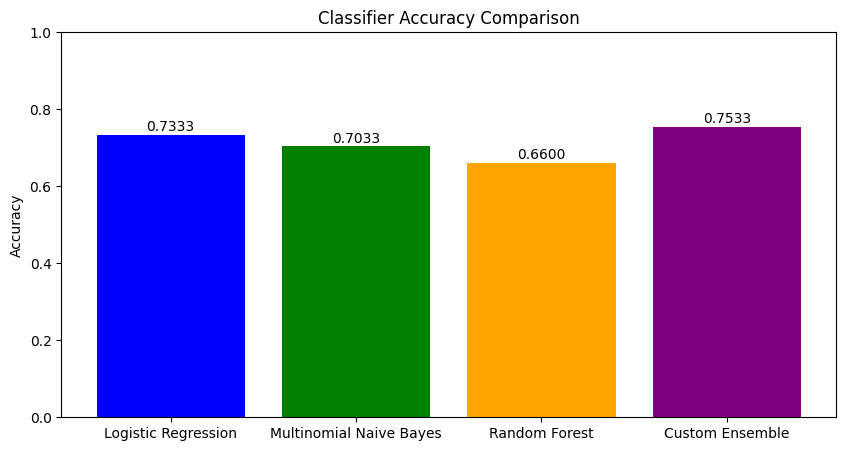

In [122]:
accuracies = {
    'Logistic Regression': accuracy_lr,
    'Multinomial Naive Bayes': accuracy_nb,
    'Random Forest': accuracy_rf,
    'Custom Ensemble': accuracy_custom
}
plt.figure(figsize=(10, 5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'purple'])
plt.title('Classifier Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.4f}', ha='center')
plt.show()